Epoch 0, Loss: 0.3914
Epoch 100, Loss: 0.2502
Epoch 200, Loss: 0.2501
Epoch 300, Loss: 0.2499
Epoch 400, Loss: 0.2498
Epoch 500, Loss: 0.2497
Epoch 600, Loss: 0.2496
Epoch 700, Loss: 0.2494
Epoch 800, Loss: 0.2493
Epoch 900, Loss: 0.2491
Epoch 1000, Loss: 0.2489
Epoch 1100, Loss: 0.2487
Epoch 1200, Loss: 0.2484
Epoch 1300, Loss: 0.2481
Epoch 1400, Loss: 0.2477
Epoch 1500, Loss: 0.2472
Epoch 1600, Loss: 0.2466
Epoch 1700, Loss: 0.2459
Epoch 1800, Loss: 0.2450
Epoch 1900, Loss: 0.2439

Predictions:
[[0.443]
 [0.513]
 [0.519]
 [0.553]]


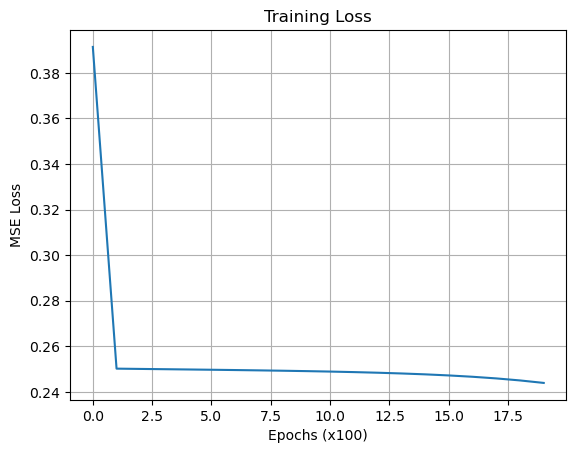

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.rand(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def feedforward(self, x):
        self.z1 = sigmoid(np.dot(x, self.w1) + self.b1)
        self.out = sigmoid(np.dot(self.z1, self.w2) + self.b2)
        return self.out

    def backprop(self, x, y, lr):
        error = y - self.out
        d_out = error * sigmoid_deriv(self.out)
        d_hidden = d_out.dot(self.w2.T) * sigmoid_deriv(self.z1)

        self.w2 += self.z1.T.dot(d_out) * lr
        self.b2 += np.sum(d_out, axis=0, keepdims=True) * lr
        self.w1 += x.T.dot(d_hidden) * lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    def train(self, x, y, epochs, lr):
        losses = []
        for epoch in range(epochs):
            self.feedforward(x)
            self.backprop(x, y, lr)
            if epoch % 100 == 0:
                loss = np.mean((y - self.out) ** 2)
                losses.append(loss)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

# Main
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

nn = NeuralNetwork(2, 4, 1)
losses = nn.train(x, y, 2000, 0.1)

print("\nPredictions:")
print(np.round(nn.feedforward(x), 3))

# Plotting
plt.plot(losses)
plt.xlabel("Epochs (x100)")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()
